In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
path = "GamingStudy_data.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()

In [134]:
df.columns

Index(['Unnamed: 0', 'Zeitstempel', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5',
       'GAD6', 'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [135]:
print(df.dtypes)


Unnamed: 0           int64
Zeitstempel        float64
GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
S

In [142]:
df["Hours"] = pd.to_numeric(df["Hours"], errors="coerce")  # Convert Hours to numeric

# Convert SPIN scores to numeric
spin_cols = [f"SPIN{i}" for i in range(1, 18)]  # Assuming SPIN columns are named SPIN1, SPIN2, ..., SPIN17
# Convert SPIN scores to integers
# df[spin_cols] = df[spin_cols].astype(int)
df[spin_cols] = df[spin_cols].apply(pd.to_numeric, errors="coerce")

# Convert GAD scores to numeric
gad_cols = [f"GAD{i}" for i in range(1, 8)]  # Assuming GAD columns are named GAD1, GAD2, ..., GAD7
df[gad_cols] = df[gad_cols].apply(pd.to_numeric, errors="coerce")

# Convert SWL scores to numeric
swl_cols = [f"SWL{i}" for i in range(1, 6)]  # Assuming SWL columns are named SWL1, SWL2, ..., SWL5
df[swl_cols] = df[swl_cols].apply(pd.to_numeric, errors="coerce")

# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["SPIN_T"] = pd.to_numeric(df["SPIN_T"], errors="coerce")
df["SWL_T"] = pd.to_numeric(df["SWL_T"], errors="coerce")
df["GAD_T"] = pd.to_numeric(df["GAD_T"], errors="coerce")
# df["SPIN_T"] = df["SPIN_T"].astype(int)
df["SPIN_T"] = pd.to_numeric(df["SPIN_T"], errors = "coerce")

In [139]:
df.head()

,Unnamed: 0,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.004366,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.006803,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.038599,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.068037,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.089478,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


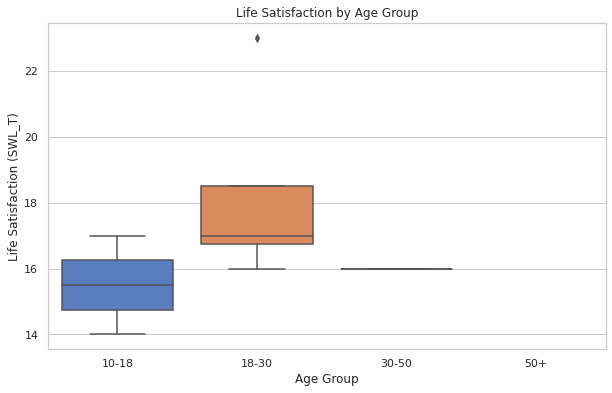

In [151]:
import numpy as np

# Define the age group bins
age_bins = [0, 25, 40, 50, np.inf]  # Define the age bins: 0-25, 25-40, 40-50, 50+

# Define the age group labels
age_labels = ['10-18', '18-30', '30-50', '50+']

# Create a new column in the DataFrame for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='SWL_T', data=df, palette='muted')
plt.title('Life Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Life Satisfaction (SWL_T)')
plt.show()

In [ ]:
# import pandas as pd

# # Assuming df is your DataFrame with the "whyplay" column
# whyplay_counts = df['whyplay'].value_counts()

# # Create a DataFrame from the value counts
# whyplay_counts_df = pd.DataFrame({'Why Play': whyplay_counts.index, 'Frequency': whyplay_counts.values})
# # pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)

# # Display the DataFrame
# whyplay_counts_df

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['Birthplace'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'Country': country_counts.index, 'Frequency': country_counts.values})

# Display the DataFrame
country_counts_df

In [ ]:
# import pandas as pd

# # Assuming df is your DataFrame with the "whyplay" column
# country_counts = df['Playstyle'].value_counts()

# # Create a DataFrame from the value counts
# country_counts_df = pd.DataFrame({'Playstyle': country_counts.index, 'Frequency': country_counts.values})
# # pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)

# # Display the DataFrame
# country_counts_df

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['Game'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'Game': country_counts.index, 'Frequency': country_counts.values})
country_counts_df

In [ ]:
# Example genre mapping dictionary (you'll need to expand this)
genre_map = {
    "Skyrim": "Role-Playing Game (RPG)",
    "League of Legends": "Multiplayer Online Battle Arena (MOBA)",
    "Heroes of the Storm" : "Multiplayer Online Battle Arena (MOBA)",
    "Counter Strike":  "Tactical First Person Shooter",
    "StarCraft": "Military Science",
    "Diablo 3": "digital card game",
    "Hearthstone": "Action RPG",
    "Guild Wars 2": "Combative",
    "Destiny":  "",
    # Add more games and genres here
}

def get_genre(game_name):
  """
  This function takes a game name and returns the corresponding genre from the genre_map dictionary.
  """
  return genre_map.get(game_name, "Unknown")  # Return "Unknown" if the game is not found
import pandas as pd

# # Assuming df is your DataFrame with the "whyplay" column
# country_counts = df['Playstyle'].value_counts()

# # Create a DataFrame from the value counts
# country_counts_df = pd.DataFrame({'Playstyle': country_counts.index, 'Frequency': country_counts.values})
# # pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)

# # Display the DataFrame
# country_counts_df
df["genre"] = df["Game"].apply(get_genre)

In [ ]:
df.head()

In [ ]:
# averages = df.groupby('Birthplace')[['GAD_T', 'SWL_T', 'SPIN_T']].mean()
# averages

In [ ]:
import pandas as pd

# Assuming your data is in a Pandas DataFrame called 'data' with a column named 'whyplay'

def simplify_playstyle(playstyle):
  """
  This function takes a playstyle response and assigns it to a simplified category.
  """
  playstyle = playstyle.lower()  # Convert to lowercase for easier comparison
  
  if "singleplayer" in playstyle:
    return "Singleplayer"
  
  elif "friends" in playstyle and ("real life" in playstyle or "irl" in playstyle):
    return "Multiplayer with Real-Life Friends"
  
  # elif "online" in playstyle and ("acquaintances" in playstyle or "teammates" in playstyle):
  #   return "Multiplayer with Online Acquaintances/Teammates"
  
  # elif "strangers" in playstyle or "solo" in playstyle or "ranked" in playstyle:
  #   return "Multiplayer with Strangers"

  elif "multiplayer" in playstyle and "online" in playstyle:
    return "Multiplayer online"
  
  elif "all" in playstyle or "mix" in playstyle or "both" in playstyle:
    return "Mixed"
  else:
    return "Other"  # Category for unclear or uncommon responses

# Apply the function to the 'whyplay' column and create a new column called 'simplified_playstyle'
df["simplified_playstyle"] = df["Playstyle"].apply(simplify_playstyle)

# Explore the distribution of the simplified categories
print(df["simplified_playstyle"].value_counts())

In [ ]:
type(df["Hours"])
df["Hours"] = pd.to_numeric(df["Hours"], errors="coerce")  # Convert Hours to numeric
df = df[df["Hours"] <= 168]
sorted_hours = df['Hours'].sort_values(ascending=False)

# Print the sorted values
print(sorted_hours)

In [ ]:
correlation_coefficient = df["Hours"].corr(df["GAD_T"])

# Plot scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(df["Hours"], df["GAD_T"], alpha=0.5)
plt.title("Relationship between Hours Played per Week and Anxiety Levels (Hours <= 50)")
plt.xlabel("Hours Played per Week")
plt.ylabel("GAD-7 Score")
plt.grid(True)
plt.show()

print("Correlation Coefficient between Hours Played per Week and GAD-T Score (Hours <= 50):", correlation_coefficient)

In [141]:
df.isnull().sum()

Unnamed: 0             0
Zeitstempel            0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(20, 8))  # Adjust the values as needed

# Rest of the plotting code remains the same, e.g.,
sns.histplot(df['Hours'], kde=True)
plt.xlabel("Hours Played per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Gaming Hours")
plt.grid(True)
plt.show()

In [ ]:
correlation = df['Hours'].corr(df['GAD_T'])
print("Correlation between Hours and GAD_T:", correlation)

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot(x='Hours', y='GAD_T', data=df)
plt.xlabel("Hours Played per Week")
plt.ylabel("GAD Score")
plt.title("Scatter Plot with regression for Gaming Hours vs. Anxiety")
plt.show()

In [ ]:
# Filter out rows with missing values in SPIN_T column
df = df.dropna(subset=["SPIN_T"])

# Calculate correlation coefficient between hours played per week and GAD-7 scores
correlation_coefficient = df["Hours"].corr(df["SPIN_T"])

# Plot scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(df["Hours"], df["SPIN_T"], alpha=0.5)
plt.title("Relationship between Hours Played per Week and Anxiety Levels")
plt.xlabel("Hours Played per Week")
plt.ylabel("SPIN-T Score")
plt.grid(True)
plt.show()

print("Correlation Coefficient between Hours Played per Week and SPIN-T Score:", correlation_coefficient)

In [ ]:
df = df.dropna(subset=["SWL_T"])

# Calculate correlation coefficient between hours played per week and GAD-7 scores
correlation_coefficient = df["Hours"].corr(df["SWL_T"])

# Plot scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(df["Hours"], df["SWL_T"], alpha=0.5)
plt.title("Relationship between Hours Played per Week and Life Satisfaction)")
plt.xlabel("Hours Played per Week")
plt.ylabel("SWL_T Score")
plt.grid(True)
plt.show()

print("Correlation Coefficient between Hours Played per Week and SWL_T Score (Hours <= 50):", correlation_coefficient)

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming 'data' contains your DataFrame with the provided data
# Assuming you have already loaded the data into 'data'

# First, calculate the top 10 countries by frequency
top_countries = df['Birthplace'].value_counts().head(10).index

# Filter the data for only the top 10 countries
filtered_data = df[df['Birthplace'].isin(top_countries)]

# Next, melt the DataFrame to have a single 'Score' column
melted_data = pd.melt(filtered_data, id_vars=['Birthplace'], var_name='Score')

# Plot the data using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='value', hue='Birthplace', data=melted_data)
plt.title('Scores (GAD_T, SWL_T, SPIN_T) by Top 10 Birthplaces')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming 'data' is your cleaned pandas DataFrame


# Box Plot with Seaborn for playsyle
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Playstyle", y="SPIN_T",
            palette="Set3", linewidth=2.5)
plt.title("SPIN_T Scores by Playstyle")
plt.show()


# 3D Scatter Plot
fig = px.scatter_3d(df, x="SPIN_T", y="GAD_T", z="Hours",
                    symbol="Playstyle")
fig.show()

# Violin Plot
fig = px.violin(df, y="Hours", x="Platform", box=True, points="all")
fig.show()

# make an appropriate graph for work and gaming hours other than scatter plot, boxplot, violin plot
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="Work", y="Hours", hue="Platform")
plt.title("Average Hours of Gaming by Work Status")

# # make an appropriate graph for anxiety levels and whyplay
# plt.figure(figsize=(10, 8))



plt.title("Life Satisfaction by Age Group")
plt.show()
# You can explore more plot types and customization options within these libraries.

ValueError: Could not interpret input 'Playstyle'

<Figure size 720x576 with 0 Axes>

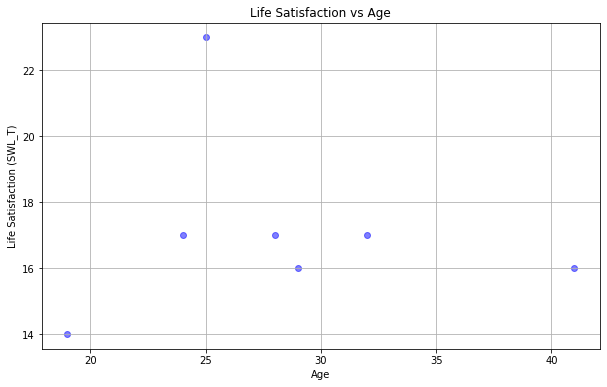

In [144]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SWL_T'], color='blue', alpha=0.5)
plt.title('Life Satisfaction vs Age')
plt.xlabel('Age')
plt.ylabel('Life Satisfaction (SWL_T)')
plt.grid(True)
plt.show()
